In [1]:
import nest_asyncio
nest_asyncio.apply()

In [266]:
import pandas as pd
import re
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LG그램\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LG그램\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [256]:
since = input("since(2021-06-21) : ")
until = input("until(2021-06-21) : ")

since(2021-06-21) : 2021-06-20
until(2021-06-21) : 2021-06-21


In [152]:
import twint
c = twint.Config()
c.Search = 'tesla'
c.Limit = 100
c.Since=since
c.Until = until
c.Output = 'Tesla_Tweet.csv'
c.Pandas = True
twint.run.Search(c)

1403502284361932800 2021-06-12 08:59:55 +0900 <ChrisNalley7> @Investments_CEO If only dogecoin were more than just if. Always if questions from everyone. Doge is destined for greatness, get the if out your mouths. WHEN tesla accepts, WHEN coinbase wakes up. WHEN the doubters say shoulda woulda could. Then don't ask just DO.
1403502273557417986 2021-06-12 08:59:52 +0900 <mentalbrethmint> @SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113 @tesla_johnny  https://t.co/G3PArwugR0
1403502270126428167 2021-06-12 08:59:51 +0900 <Jason_lloydd> @Starbuk99 @WilliamRoark17 @Teslarati @Tesla Bro I’m more of a blue collar worker than you’ll ever be. You lost that battle real quick. I don’t even need to know what you do to gaurentee that my hands get dirtier doing a much cooler job, probably for better wages 💁🏻‍♂️ also majority of truck buyers don’t work on farms 😂
1403502258617257986 2021-06-12 08:59:48 +0900 <thaynacrissilva> Tesla tudo que eu faço essa droga de cena detesta
1403502246818635776 2021-06

In [226]:
twint.output.panda.Tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [267]:
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

In [268]:
tweets = twint_to_pd(["id", "tweet", "date"])

In [269]:
tweets.head()
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      100 non-null    object
 1   tweet   100 non-null    object
 2   date    100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [270]:
tweets[tweets.duplicated()]

,id,tweet,date


In [271]:
tweets.shape

(100, 3)

In [289]:
def clean_tweets(dataframe):
    # Add whitespace to the end of every tweet
    dataframe['clean_tweet'] = dataframe.tweet.map(lambda x: x + " ") 
    # Remove http links
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r'http.*', '', x))
    
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub("@[a-zA-Z]+",'',x))
    # Remove special characters and numbers
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r"[^a-zA-Z]", ' ', x))
    # Lowercase all tweets
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.lower())
    
    
    #Tokenize tweets and remove stop words
    stopword_list = stopwords.words('english')
    for i in range(len(dataframe.clean_tweet)):
        tokens = word_tokenize(dataframe.clean_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        dataframe.clean_tweet[i] = clean_tokens

In [290]:
clean_tweets(tweets)
tweets.head()

<ipython-input-289-a48d13034b69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['clean_tweet'] = dataframe.tweet.map(lambda x: x + " ")
C:\heejae\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-290-93777e1888fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,id,tweet,date,clean_tweet
0,1403502284361932800,@Investments_CEO If only dogecoin were more th...,2021-06-12 08:59:55,"[ceo, dogecoin, always, questions, everyone, d..."
1,1403502273557417986,@SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...,2021-06-12 08:59:52,[johnny]
2,1403502270126428167,@Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...,2021-06-12 08:59:51,"[bro, blue, collar, worker, ever, lost, battle..."
3,1403502258617257986,Tesla tudo que eu faço essa droga de cena detesta,2021-06-12 08:59:48,"[tesla, tudo, que, eu, fa, essa, droga, de, ce..."
4,1403502246818635776,Why are used Tesla’s more then new ones,2021-06-12 08:59:46,"[used, tesla, new, ones]"


In [291]:
tweets.clean_tweet[4]

['used', 'tesla', 'new', 'ones']

In [292]:
def lemmatize_tweet(tweets):
    
    for i in range(len(tweets)):
        # Pos-tag each word in tweet
        for word in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(word)
        # Convert pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # Adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # Noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # Adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # Verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # Default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        # Lemmatize each word in tweet
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

In [293]:
lemmatize_tweet(tweets.clean_tweet)
tweets

<ipython-input-293-4d24731d1456>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lemmatize_tweet(tweets.clean_tweet)


,id,tweet,date,clean_tweet
0,1403502284361932800,@Investments_CEO If only dogecoin were more th...,2021-06-12 08:59:55,ceo dogecoin always question everyone doge des...
1,1403502273557417986,@SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...,2021-06-12 08:59:52,johnny
2,1403502270126428167,@Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...,2021-06-12 08:59:51,bro blue collar worker ever lose battle real q...
3,1403502258617257986,Tesla tudo que eu faço essa droga de cena detesta,2021-06-12 08:59:48,tesla tudo que eu fa essa droga de cena detesta
4,1403502246818635776,Why are used Tesla’s more then new ones,2021-06-12 08:59:46,use tesla new one
...,...,...,...,...
95,1403500966717100040,pussy charged up like a brand new Tesla.🔋,2021-06-12 08:54:40,pussy charge like brand new tesla
96,1403500934848663557,"if you have a tesla, you can’t drive.",2021-06-12 08:54:33,tesla drive
97,1403500911201337353,@nikkidoescrypto @George66170467 @dorsetphoto_...,2021-06-12 08:54:27,jlp sure everything right assume hear tesla ev...
98,1403500902082879490,@aboshthaaa @awatefh1 @v1LNNnRW4iWaTcG @mohamm...,2021-06-12 08:54:25,lnnnrw iwatcg ue vbfp vlf eromair h bdtnyzt jl...


In [294]:

tweets.clean_tweet[4]

'use tesla new one'

In [295]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

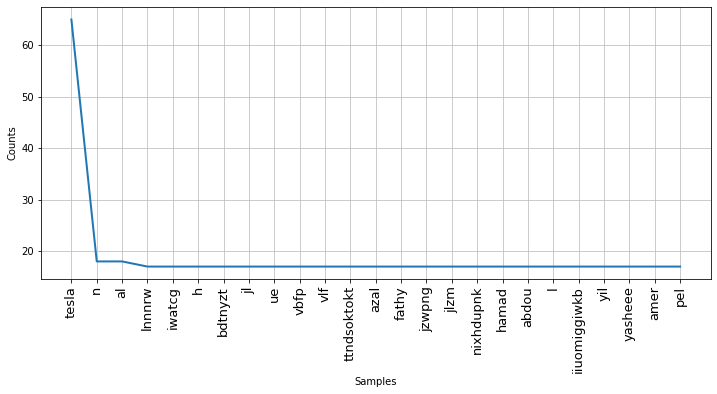

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [296]:
# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

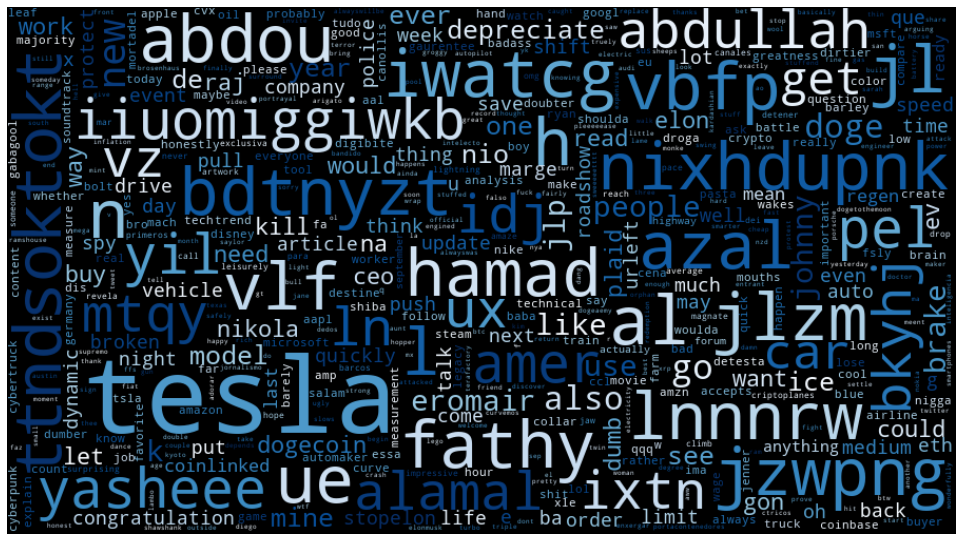

In [298]:

# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [299]:

# Remove 'tesla, 'tsla', 'q', and '#'

def finish_cleaning(dataframe):
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('tesla',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('tsla',''))
#     dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('q',''))
#     dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('#',''))

In [300]:
finish_cleaning(tweets)

C:\heejae\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


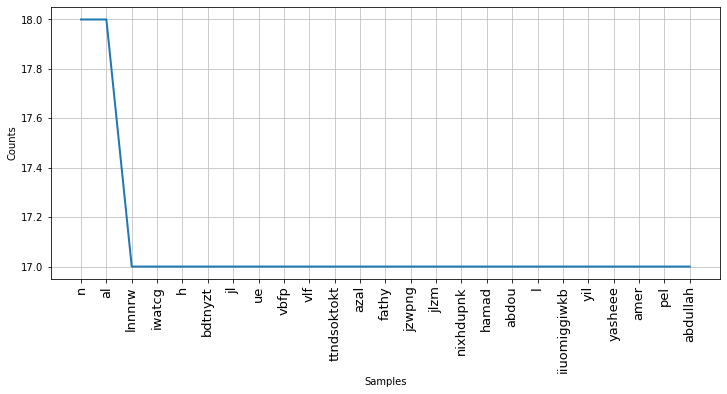

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [301]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

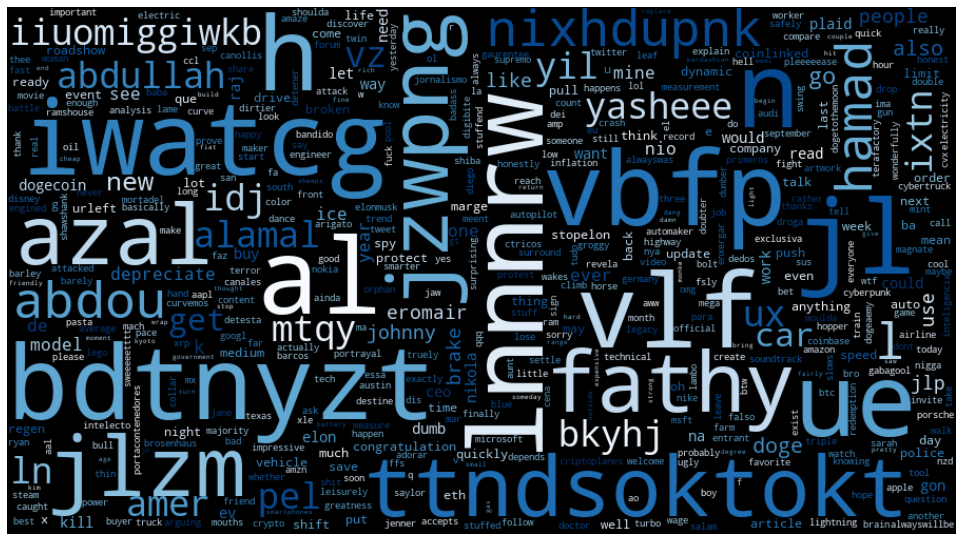

In [302]:
# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [303]:
# Find the frequency of each word in the dataframe

word_freq = nltk.FreqDist(all_words_list)
freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
freq_df.head(10)

,Word,Count
82,al,18
78,n,18
81,yasheee,17
74,nixhdupnk,17
84,pel,17
83,amer,17
63,h,17
80,yil,17
79,iiuomiggiwkb,17
77,l,17


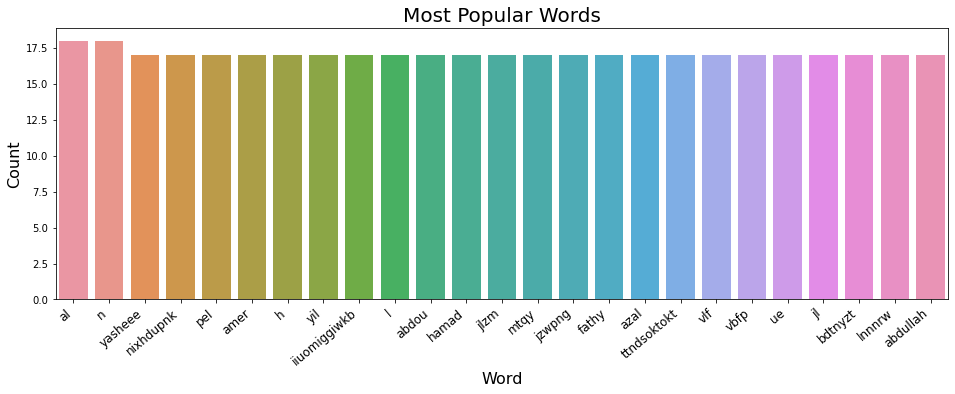

In [304]:
# Plot histogram of most frequent words

freq_df = freq_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= "Word", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Word', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Most Popular Words", fontsize=20)
plt.show()

In [309]:
filepath = r'./cleaned_tweets.csv'

tweets.to_csv(filepath, header=True)

test = pd.read_csv('cleaned_tweets.csv')
test.head(10)

,Unnamed: 0,id,tweet,date,clean_tweet
0,0,1403502284361932800,@Investments_CEO If only dogecoin were more th...,2021-06-12 08:59:55,ceo dogecoin always question everyone doge des...
1,1,1403502273557417986,@SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...,2021-06-12 08:59:52,johnny
2,2,1403502270126428167,@Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...,2021-06-12 08:59:51,bro blue collar worker ever lose battle real q...
3,3,1403502258617257986,Tesla tudo que eu faço essa droga de cena detesta,2021-06-12 08:59:48,tudo que eu fa essa droga de cena detesta
4,4,1403502246818635776,Why are used Tesla’s more then new ones,2021-06-12 08:59:46,use new one
5,5,1403502219077455873,@elonmusk TESLA is shit car,2021-06-12 08:59:39,shit car
6,6,1403502206326919170,@awatefh1 @XfaisalhamadX @mohammedabdo140 @v1L...,2021-06-12 08:59:36,lnnnrw iwatcg h bdtnyzt jl ue vbfp vlf ttndsok...
7,7,1403502197762007041,@ericbwagner @ScottAdamsSays The tech all of t...,2021-06-12 08:59:34,tech use measure brain like steam train measur...
8,8,1403502155928068096,This nigga bought the 2021 Dumb and Dumber Tesla.,2021-06-12 08:59:24,nigga buy dumb dumber
9,9,1403502138643435529,"Technical Analysis of Apple, Tesla, Nio, Nike,...",2021-06-12 08:59:20,technical analysis apple nio nike qqq spy ama...


In [308]:
from textblob import TextBlob

cnt = 0
for t in tweet_df['tweet']:
    blob = TextBlob(t)
    print (cnt,blob.sentiment[0])
    cnt +=1

0 0.25
1 0.0
2 0.33999999999999997
3 0.0
4 0.3181818181818182
5 -0.2
6 0.0
7 0.4681818181818182
8 -0.375
9 0.13333333333333333
10 0.0
11 0.0
12 0.6
13 0.0
14 0.0
15 0.0
16 -0.15468749999999992
17 -0.004166666666666676
18 0.0
19 0.0
20 0.0
21 0.5
22 0.0
23 -0.12499999999999999
24 -0.05
25 0.0
26 0.0
27 0.2901515151515151
28 0.0
29 0.5750000000000001
30 -0.2625
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 -0.35
38 -0.125
39 0.125
40 0.13636363636363635
41 0.0
42 0.0
43 0.55
44 0.0
45 0.25
46 0.5
47 0.2
48 0.0
49 0.0
50 -0.4
51 -0.2
52 0.4
53 0.0
54 -0.375
55 0.0
56 0.0
57 -0.15555555555555559
58 0.0
59 0.0
60 0.13636363636363635
61 0.13636363636363635
62 0.0
63 0.6041666666666666
64 -0.5
65 0.0
66 0.13636363636363635
67 0.0
68 0.0
69 0.0
70 0.0
71 0.0
72 -0.025
73 -0.9765625
74 0.425
75 0.0
76 0.0
77 0.21388888888888888
78 0.04166666666666667
79 0.0
80 0.0
81 0.0
82 0.1875
83 -0.25
84 0.19375
85 0.0
86 -0.4000000000000001
87 0.0
88 0.24232954545454546
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
9

In [235]:
tweet_df.head(20)

,id,tweet,date
0,1403502284361932800,@Investments_CEO If only dogecoin were more th...,2021-06-12 08:59:55
1,1403502273557417986,@SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...,2021-06-12 08:59:52
2,1403502270126428167,@Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...,2021-06-12 08:59:51
3,1403502258617257986,Tesla tudo que eu faço essa droga de cena detesta,2021-06-12 08:59:48
4,1403502246818635776,Why are used Tesla’s more then new ones,2021-06-12 08:59:46
5,1403502219077455873,@elonmusk TESLA is shit car,2021-06-12 08:59:39
6,1403502206326919170,@awatefh1 @XfaisalhamadX @mohammedabdo140 @v1L...,2021-06-12 08:59:36
7,1403502197762007041,@ericbwagner @ScottAdamsSays The tech all of t...,2021-06-12 08:59:34
8,1403502155928068096,This nigga bought the 2021 Dumb and Dumber Tesla.,2021-06-12 08:59:24
9,1403502138643435529,"Technical Analysis of Apple, Tesla, Nio, Nike,...",2021-06-12 08:59:20


In [230]:
import re
cnt =0
for t in tweet_df['tweet']:
    t = t.lower()
    t = re.sub('[^a-zA-Z]' , ' ', t)
    t = re.sub('@[\w_]+', '', t)
    t = re.sub('http[0-9a-zA-Zㄱ-ㅎ가-힣 /]*', '', t)
    t = re.sub('[\s]+' , ' ', t)
    tweet_df['tweet'][cnt]=t
    cnt +=1
#     tweet_df['tweet']
    print(tweet_df['tweet'][cnt-1])

 investments ceo if only dogecoin were more than just if always if questions from everyone doge is destined for greatness get the if out your mouths when tesla accepts when coinbase wakes up when the doubters say shoulda woulda could then don t ask just do 
 syncsam monkeytreefrog and is keem tesla johnny 
 starbuk williamroark teslarati tesla bro i m more of a blue collar worker than you ll ever be you lost that battle real quick i don t even need to know what you do to gaurentee that my hands get dirtier doing a much cooler job probably for better wages also majority of truck buyers don t work on farms 
tesla tudo que eu fa o essa droga de cena detesta
why are used tesla s more then new ones
 elonmusk tesla is shit car
 awatefh xfaisalhamadx mohammedabdo v lnnnrw iwatcg u h bdtnyzt jl ue vbfp a vlfs cdi ttndsoktokt fodiifhd osamah aboshthaaa gh azal gaweisha mahmoodshihab khaledh kkhaled fathy hamadamosbahya ksa lvydkxnbbewlyrl gn jzwpng jlzm vfwwb nixhdupnk aalsalm hoor aboshathaaa 

<ipython-input-230-b5aace052dc2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['tweet'][cnt]=t
C:\heejae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [217]:
from textblob import TextBlob


for t in tweet_df['tweet']:
    blob = TextBlob(t)
    print (blob.sentiment[0])

0.25
0.0
0.33999999999999997
0.0
0.3181818181818182
-0.2
0.0
0.4681818181818182
-0.375
0.13333333333333333
0.0
0.0
0.6
0.0
0.0
0.0
-0.24999999999999992
-0.004166666666666676
0.0
0.0
0.0
0.5
0.0
-0.12499999999999999
-0.05
0.0
0.0
0.27878787878787875
0.0
0.5750000000000001
-0.2625
0.0
0.0
0.0
0.0
0.0
0.0
-0.35
-0.125
0.125
0.13636363636363635
0.0
0.0
0.55
0.0
0.0
0.5
0.2
0.0
0.0
-0.4
-0.2
0.4
0.0
-0.375
0.0
0.0
-0.15555555555555559
0.0
0.0
0.13636363636363635
0.13636363636363635
0.0
0.4708333333333334
-0.25
0.0
0.13636363636363635
0.0
0.0
0.0
0.0
0.0
-0.041666666666666664
-0.5
0.425
0.0
0.0
0.21388888888888888
0.04166666666666667
0.0
0.0
0.0
0.1875
-0.25
0.19375
0.0
-0.4000000000000001
0.0
0.1787878787878788
0.0
0.0
0.0
0.0
0.0
0.0
0.13636363636363635
0.0
-0.17285714285714288
0.0
-0.13


In [31]:
import re

# Basic Cleaning Text Function
def CleanText(readData, Num=False, Eng=False):

    # Remove Retweets 
    text = re.sub('RT @[\w_]+: ', '', readData)

    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)

    # Remove or Replace URL 
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) # http로 시작되지 않는 url
    
    # Remove Hashtag
    text = re.sub('[#]+[0-9a-zA-Z_]+', ' ', text)

    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)

    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    
    # Remove newline
    text = text.replace('\n',' ')
    
    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+',' ',text)
    
    if Eng is True:
        # Remove English 
        text = re.sub('[a-zA-Z]' , ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())
       
    return text

In [147]:
import re
cnt =0
for t in tweet_df['tweet']:
#     t = re.sub('[ ]+' , ' ', t)
    t = re.sub('[a-zA-Z]' , ' ', t)
    t = re.sub(r'\d+',' ',t)
    t = re.sub('@[0-9a-zA-Zㄱ-ㅎ가-힣]*', '', t)
    t = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣 ]', '', t)
    t = re.sub('http[0-9a-zA-Zㄱ-ㅎ가-힣 /]*', '', t)
    t = re.sub('[\s\n ]+' , ' ', t)
    tweet_df['tweet'][cnt]=t
    cnt +=1
#     tweet_df['tweet']
    print(t)

캐시 우드는 년 테슬라 판매 대수가 최대 천 만대에 이를 것으로 전망하지만 내 생각에 그건 불가능하다고 본다 
노르웨이에도 인구대비 테슬라 꾸준히 판매중
 저는 원래 운전을 좋아하지 않아서 차 욕심이 없었는데 테슬라는 가지고 싶더라구요
포르셰보다 빠르고 볼보보다 안전한 테슬라 모델 딜리버리 이벤트 요약 출처 
정확히 무얼 참느냐면 네 심장 즉 마음의 심경 변화를 일으킬 시에 너의 뇌 변화가 일어날 것이냐는 실험이었지
꼬따오라는 작은 섬을 여행하고 있습니다 메가팩의 잠재력은 이런 작은 섬 외딴 시골에서 더욱 빛을 발위할 것임을 느끼게 되었습니다 육지에 비해 수배나 비싼 전기료 작은 마을의 주요 소음 공해 잦은 정전 이 모든 것을 해결할 수 있는 최고의 선택은 테슬라입니다 테슬라
하 차에서 자려고 했는데 애비가 궁금하지도 않은 테슬라 전기차 이야기 처하네
 테슬라면 그걸로 끝 ㅋㅋ 
복수초의 꽃말은 슬픈 추억이야 하우스에 식물 백과 있잖아
물론 후발주자로 이런 플랫폼 만들어서 장사하려는 지엠 폭스바겐 현다이 이런곳이 있으므로 테슬라만 매수해서 가긴 좀 위험하다고 생각하고 그래서 저런 기업들도 같이 매수하거나 로 가는것이 안전하다고 생각함
나는 개인적으로 테슬라의 자율주행은 잘안될거라고 보고 있지만 라이다 달기전엔 그래도 얘네가 만들어둔 플랫폼은 다른곳보다 훨씬 잘만들어놓은것으로 판단하므로 앞으로 어느정도 계속해서 점유율은 유지할거라 판단함
 이래서 아직 테슬라에 투자할 맛 납니다 시간이 지나고 지금의 애플처럼 된다며 테슬라에 투자재미가 많이 감소할듯요
테슬라에 억 올인 하신 분도 있네요 테슬라에 올인하는 그녀의 가족들도 알고보니 모두 테슬라뉴스에 멘탈흔들리는 테올할 출처 
몰래 우는 건 어떻게 아는 거야 숨어서 울었는데본 건가
테슬라가 처음 나왔을 때 바퀴달린 아이폰이라 했었지 느낌은 그랬으나 시장의 절반을 먹기에는 경쟁자들이 너무 많다 앞으로 년 안에 수 많은 안드로이드 전기차들이 쏟아져 나올 것 같다
 테슬라 모터
테슬라의 가치와는 별개로 사이버펑크 게임은 사

<ipython-input-147-4b33e706d994>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['tweet'][cnt]=t
C:\heejae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
